<div style='color: red; text-align: center;'> <h3>Amna Muzaffar</h3>  <h3>04072013003</h3   <h3>Assignment 1</h    <p>Comparison of Built-in Predictor and Custom Predictor</div>


<h3 style='color: blue;'>Using Chat.txt</h3>

In [63]:
import csv
from datetime import datetime
from difflib import SequenceMatcher
with open('chat.txt', 'r', encoding='utf-8') as file:
    conversation_log = file.read()

<h3 style='color: blue;'>Making CSV</h3>

In [64]:
# Split the conversation log into individual messages
messages = conversation_log.strip().split('\n')

# Create an empty list to store the data
data = []

# Initialize variables for the first message in a pair
timestamp1 = None
msg1 = ''
sender1 = ''

# Process the messages to create pairs and extract data
for i in range(1, len(messages), 2):
    parts1 = messages[i - 1].split(' - ')
    parts2 = messages[i].split(' - ')

    if len(parts1) >= 2 and len(parts2) >= 2:
        timestamp1 = datetime.strptime(parts1[0], '%d/%m/%Y, %I:%M %p')
        sender1, msg1 = parts1[1].split(':', 1)

        timestamp2 = datetime.strptime(parts2[0], '%d/%m/%Y, %I:%M %p')
        sender2, msg2 = parts2[1].split(':', 1)


        # Calculate text similarity
        similarity =0;

        # Calculate the number of words
        num_words_msg1 = len(msg1.split())
        num_words_msg2 = len(msg2.split())

        # Determine time of day (morning, afternoon, evening)
        if 5 <= timestamp1.hour < 12:
            time_of_day1 = 'morning'
        elif 12 <= timestamp1.hour < 17:
            time_of_day1 = 'afternoon'
        else:
            time_of_day1 = 'evening'

        # Calculate the ratio of unique words
        unique_words_msg1 = len(set(msg1.split()))
        unique_words_msg2 = len(set(msg2.split()))
        unique_word_ratio_msg1 = unique_words_msg1 / num_words_msg1 if num_words_msg1 > 0 else 0.0
        unique_word_ratio_msg2 = unique_words_msg2 / num_words_msg2 if num_words_msg2 > 0 else 0.0

        # Calculate the time difference
        time_diff = (timestamp2 - timestamp1).total_seconds()

        # Append data to the list
        data.append({
            "timestamp1": timestamp1,
            "sender1": sender1,
            "message_text1": msg1,
            "timestamp2": timestamp2,
            "sender2": sender2,
            "message_text2": msg2,
            "text_similarity": similarity,
            "num_words_message_1": num_words_msg1,
            "num_words_message_2": num_words_msg2,
            "time_of_day": time_of_day1,
            "unique_word_ratio_message_1": unique_word_ratio_msg1,
            "unique_word_ratio_message_2": unique_word_ratio_msg2,
            "message_timing_seconds": time_diff,
             "is_response": 0,
        })

# Create a DataFrame from the data
import pandas as pd

df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('mychatlog.csv', index=False)


<h3 style='color: blue;'>Finding Similarity</h3>

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
def calculate_cosine_similarity(str1, str2):
    text = [str1, str2]
    vectorizer = CountVectorizer().fit_transform(text)
    vectors = vectorizer.toarray()
    similarity = cosine_similarity([vectors[0]], [vectors[1]])[0][0]
    return round(similarity, 3)  
    return round(similarity, 3) 

In [66]:
# Set a similarity threshold
similarity_threshold = 0.1

# Calculate cosine similarity and set "is_response" label
df['text_similarity'] = df.apply(lambda row: calculate_cosine_similarity(row['message_text1'], row['message_text2']), axis=1)
df['is_response'] = df['text_similarity'].apply(lambda similarity: 1 if similarity > similarity_threshold else 0)

# Save the updated DataFrame to a new CSV file
df.to_csv('chatlog_dataset.csv', index=False)

In [67]:
columns_to_round = ['text_similarity', 'unique_word_ratio_message_1', 'unique_word_ratio_message_2']

# Round the specified columns to 3 decimal places
df[columns_to_round] = df[columns_to_round].round(3)

# Save the DataFrame to a CSV file
df.to_csv('chatlog_dataset.csv', index=False)
df.head()

,timestamp1,sender1,message_text1,timestamp2,sender2,message_text2,text_similarity,num_words_message_1,num_words_message_2,time_of_day,unique_word_ratio_message_1,unique_word_ratio_message_2,message_timing_seconds,is_response
0,2023-09-03 20:07:00,Pwh Services,Good evening Hassan here,2023-09-03 20:08:00,Amna,Good Evening yes,0.577,4,3,evening,1.0,1.000,60.0,1
1,2023-09-03 20:08:00,Pwh Services,I have seen documentation and erd,2023-09-03 20:08:00,Amna,ok,0.000,6,1,evening,1.0,1.000,0.0,0
2,2023-09-03 20:09:00,Pwh Services,I am sending it for approval.If there will be...,2023-09-03 20:09:00,Amna,Okay will inform you.,0.267,14,4,evening,1.0,1.000,0.0,1
3,2023-09-03 20:09:00,Pwh Services,Tell me about project price and i will give y...,2023-09-03 20:10:00,Amna,Ok,0.000,12,1,evening,1.0,1.000,60.0,0
4,2023-09-03 20:10:00,Pwh Services,Have you ever did in react or some other fram...,2023-09-03 20:11:00,Amna,Yes i have done work in react also in djanog ...,0.351,10,12,evening,1.0,0.917,60.0,1


<h3 style='color: blue;'>Feature Extraction</h3>

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy 
from nltk.corpus import stopwords
import nltk 
from nltk.sentiment  import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('stopwords')
sid=SentimentIntensityAnalyzer()
# Initialize spacy for semantic tokenization

nlp = spacy.load("en_core_web_sm")
# Download NLTK stop words
stop_words = set (stopwords.words('english'))
# Feature: Message Length Difference
df['message_length_difference'] = df.apply(lambda row: abs(len(row['message_text1'].split()) - len (row['message_text2'].split())), axis=1)
# Feature: Common Words
df['common_words'] = df.apply(lambda row: len(set(row['message_text1'].lower().split()) & set(row['message_text2'].lower().split())), axis=1)
# Feature: Sentiment Scores for Message 1 and Message 2
df['sentiment_message_1'] = df['message_text1'].apply(lambda text: sid.polarity_scores (text)['compound'])
df['sentiment_message_2'] = df['message_text2'].apply(lambda text: sid.polarity_scores (text) ['compound'])
df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,timestamp1,sender1,message_text1,timestamp2,sender2,message_text2,text_similarity,num_words_message_1,num_words_message_2,time_of_day,unique_word_ratio_message_1,unique_word_ratio_message_2,message_timing_seconds,is_response,message_length_difference,common_words,sentiment_message_1,sentiment_message_2
0,2023-09-03 20:07:00,Pwh Services,Good evening Hassan here,2023-09-03 20:08:00,Amna,Good Evening yes,0.577,4,3,evening,1.0,1.000,60.0,1,1,2,0.4404,0.6808
1,2023-09-03 20:08:00,Pwh Services,I have seen documentation and erd,2023-09-03 20:08:00,Amna,ok,0.000,6,1,evening,1.0,1.000,0.0,0,5,0,0.0000,0.2960
2,2023-09-03 20:09:00,Pwh Services,I am sending it for approval.If there will be...,2023-09-03 20:09:00,Amna,Okay will inform you.,0.267,14,4,evening,1.0,1.000,0.0,1,10,1,0.0000,0.2263
3,2023-09-03 20:09:00,Pwh Services,Tell me about project price and i will give y...,2023-09-03 20:10:00,Amna,Ok,0.000,12,1,evening,1.0,1.000,60.0,0,11,0,0.0000,0.2960
4,2023-09-03 20:10:00,Pwh Services,Have you ever did in react or some other fram...,2023-09-03 20:11:00,Amna,Yes i have done work in react also in djanog ...,0.351,10,12,evening,1.0,0.917,60.0,1,2,3,0.0000,0.4019


In [69]:
df = pd.get_dummies(df, columns=['time_of_day'], prefix=['time_of_day'])
# Assuming you have a DataFrame 'df' with columns 'time_of_day_morning', 'time_of_day_afternoon', 'time_of_day_evening'
df['time_of_day_morning'] = df['time_of_day_morning'].astype(int)
df['time_of_day_afternoon'] = df['time_of_day_afternoon'].astype(int)
df['time_of_day_evening'] = df['time_of_day_evening'].astype(int)

# Save the DataFrame to a CSV file
df.to_csv('chatlog_with_responses.csv', index=False)
# Save to CSV
df.to_csv('chatlog_dataset.csv', index=False)
df.head()

,timestamp1,sender1,message_text1,timestamp2,sender2,message_text2,text_similarity,num_words_message_1,num_words_message_2,unique_word_ratio_message_1,unique_word_ratio_message_2,message_timing_seconds,is_response,message_length_difference,common_words,sentiment_message_1,sentiment_message_2,time_of_day_afternoon,time_of_day_evening,time_of_day_morning
0,2023-09-03 20:07:00,Pwh Services,Good evening Hassan here,2023-09-03 20:08:00,Amna,Good Evening yes,0.577,4,3,1.0,1.000,60.0,1,1,2,0.4404,0.6808,0,1,0
1,2023-09-03 20:08:00,Pwh Services,I have seen documentation and erd,2023-09-03 20:08:00,Amna,ok,0.000,6,1,1.0,1.000,0.0,0,5,0,0.0000,0.2960,0,1,0
2,2023-09-03 20:09:00,Pwh Services,I am sending it for approval.If there will be...,2023-09-03 20:09:00,Amna,Okay will inform you.,0.267,14,4,1.0,1.000,0.0,1,10,1,0.0000,0.2263,0,1,0
3,2023-09-03 20:09:00,Pwh Services,Tell me about project price and i will give y...,2023-09-03 20:10:00,Amna,Ok,0.000,12,1,1.0,1.000,60.0,0,11,0,0.0000,0.2960,0,1,0
4,2023-09-03 20:10:00,Pwh Services,Have you ever did in react or some other fram...,2023-09-03 20:11:00,Amna,Yes i have done work in react also in djanog ...,0.351,10,12,1.0,0.917,60.0,1,2,3,0.0000,0.4019,0,1,0


<h3 style='color: blue;'>Train/test Split</h3>

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


# Select features (Step 2)
features = ["text_similarity", "num_words_message_1", "num_words_message_2", "unique_word_ratio_message_1",
            "unique_word_ratio_message_2", "message_timing_seconds", "time_of_day_evening",
            "time_of_day_morning", "time_of_day_afternoon","message_length_difference", "common_words", "sentiment_message_1", "sentiment_message_2"]

X = df[features]
y = df["is_response"]  # Labels (1 or 0)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Train Set: ',X_train. shape)
print('Test Set: ',X_test.shape)

Train Set:  (116, 13)
Test Set:  (30, 13)


<h3 style='color: blue;'>Standardize Data</h3>

In [71]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h3 style='color: blue;'>Built-in Predictor</h3>

In [72]:
# Create a logistic regression model
model = LogisticRegression(C=0.01,solver="liblinear",max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Score the model on the test set
y_pred = model.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
# Print the score
print('Accuracy:', accuracy)


Accuracy: 0.9333333333333333


<h3 style='color: blue;'>Built-in Learning Curve</h3>

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\USER\AppData\Roaming\Python\Python312\sit

Step Size (C=0.001): Accuracy = 0.9000
Step Size (C=0.01): Accuracy = 0.9333
Step Size (C=0.1): Accuracy = 0.9333
Step Size (C=1): Accuracy = 1.0000
Step Size (C=10): Accuracy = 1.0000
Step Size (C=100): Accuracy = 1.0000


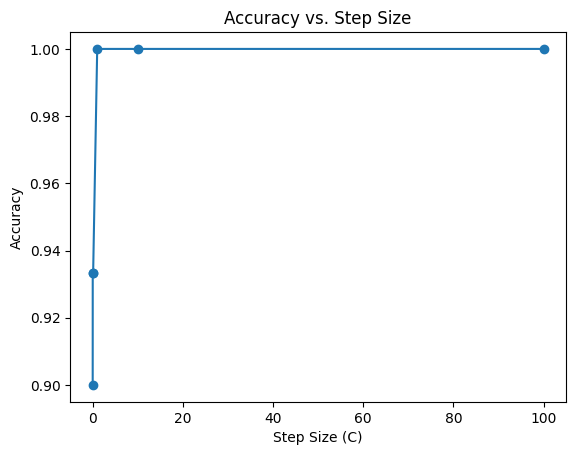

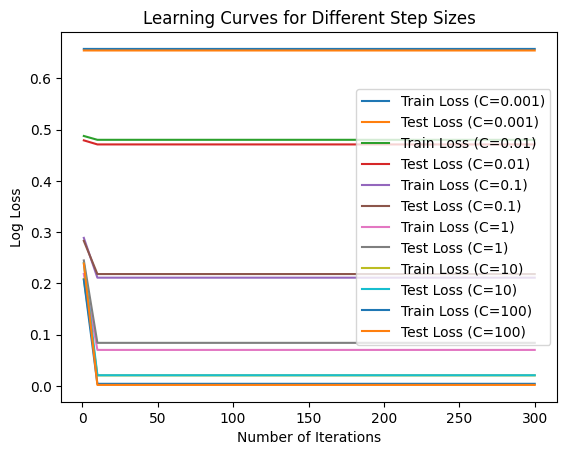

In [73]:
from sklearn.metrics import log_loss
# Create a list of different step sizes (C values)
step_sizes = [0.001, 0.01, 0.1, 1, 10, 100]

# Initialize lists to store accuracy scores for different step sizes
accuracies = []

# Initialize lists to store loss values
train_loss = []
test_loss = []

# Train and evaluate the model with different step sizes and plot learning curves
for step_size in step_sizes:
    model = LogisticRegression(C=step_size,solver="liblinear",max_iter=1000)

    # Train the model with different numbers of iterations and capture loss
    num_iterations = [1, 10, 20, 50, 100, 200, 300]
    iteration_train_loss = []
    iteration_test_loss = []

    for n in num_iterations:
        model.max_iter = n
        model.fit(X_train, y_train)
        # print(model.score());
        # Predict probabilities on the training and test data
        y_train_proba = model.predict_proba(X_train)
        y_test_proba = model.predict_proba(X_test)

        # Calculate log loss
        train_log_loss = log_loss(y_train, y_train_proba)
        test_log_loss = log_loss(y_test, y_test_proba)

        iteration_train_loss.append(train_log_loss)
        iteration_test_loss.append(test_log_loss)

    # Store accuracy for this step size
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Step Size (C={step_size}): Accuracy = {accuracy:.4f}")

    # Store the loss values for the learning curve
    train_loss.append(iteration_train_loss)
    test_loss.append(iteration_test_loss)

# Compare accuracy scores for different step sizes
plt.figure()
plt.plot(step_sizes, accuracies, marker='o', linestyle='-')
plt.xlabel("Step Size (C)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Step Size")

# Compare learning curves for different step sizes
plt.figure()
for i, step_size in enumerate(step_sizes):
    plt.plot(num_iterations, train_loss[i], label=f"Train Loss (C={step_size})")
    plt.plot(num_iterations, test_loss[i], label=f"Test Loss (C={step_size})")

plt.xlabel("Number of Iterations")
plt.ylabel("Log Loss")
plt.legend()
plt.title("Learning Curves for Different Step Sizes")

plt.show()


<h3 style='color: blue;'>Custom Predictor</h3>

In [74]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

class CustomPredictor:
    def __init__(self, learning_rate=0.01, num_iterations=1000, regularization_param=0.01):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.regularization_param = regularization_param

    def _sigmoid(self, z):
        return np.where(z >= 0, 1 / (1 + np.exp(-z)), np.exp(z) / (1 + np.exp(z)))


    def _loss(self, y, y_pred, weights):
        m = len(y)
        error = -y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred)
        reg_term = (self.regularization_param / (2 * m)) * np.sum(weights ** 2)
        return (1 / m) * np.sum(error) + reg_term

    def train(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0
        for _ in range(self.num_iterations):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(z)
    
            gradient_weights = (1 / m) * np.dot(X.T, (y_pred - y)) + \
                (self.regularization_param / m) * self.weights
            gradient_bias = (1 / m) * np.sum(y_pred - y)
    
          
            max_gradient = 1  # Set a maximum gradient value
            gradient_weights = np.clip(gradient_weights, -max_gradient, max_gradient)
            gradient_bias = np.clip(gradient_bias, -max_gradient, max_gradient)
    
            self.weights -= self.learning_rate * gradient_weights
            self.bias -= self.learning_rate * gradient_bias


    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid(z)
        return (y_pred > 0.5).astype(int)
    def predict_prob(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid(z)
        return y_pred

# Create and train the custom predictor
custom_predictor = CustomPredictor(learning_rate=0.01, num_iterations=1000, regularization_param=0.01)
custom_predictor.train(X_train, y_train)

# Make predictions on the test set
y_pred = custom_predictor.predict(X_test)


# Evaluate the custom predictor
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9333333333333333


<h3 style='color: blue;'>Custom Predictor Learning Curve</h3>

Step Size (C=0.001): Accuracy = 0.9333
Step Size (C=0.01): Accuracy = 0.9333
Step Size (C=0.1): Accuracy = 1.0000
Step Size (C=1): Accuracy = 1.0000
Step Size (C=10): Accuracy = 1.0000
Step Size (C=100): Accuracy = 1.0000


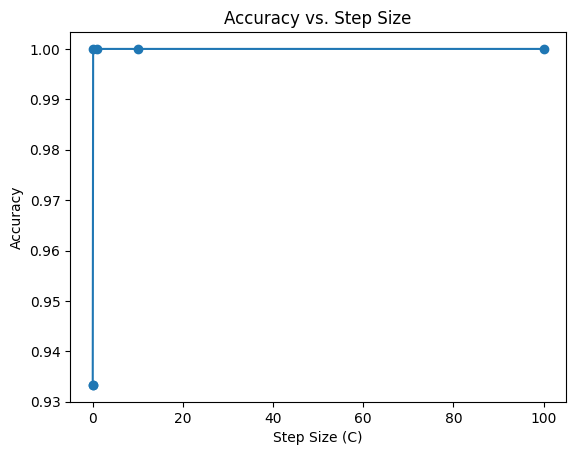

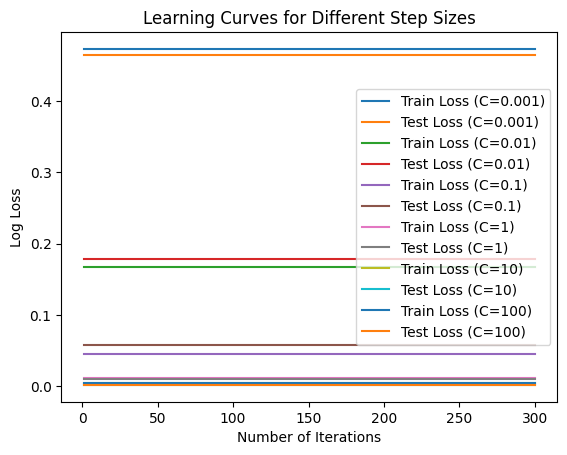

In [62]:
# Create a list of different step sizes (C values)
step_sizes = [0.001, 0.01, 0.1, 1, 10, 100]

# Initialize lists to store accuracy scores for different step sizes
accuracies = []

# Initialize lists to store loss values
train_loss = []
test_loss = []
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)
# Train and evaluate the model with different step sizes and plot learning curves
for step_size in step_sizes:
    model = CustomPredictor(learning_rate=step_size, num_iterations=1000,regularization_param=0.01)

    # Train the model with different numbers of iterations and capture loss
    num_iterations = [1, 10, 20, 50, 100, 200, 300]
    iteration_train_loss = []
    iteration_test_loss = []

    for n in num_iterations:
        model.max_iter = n
        model.train(X_train, y_train)
        # print(model.score());
        # Predict probabilities on the training and test data
        y_train_proba = model.predict_prob(X_train)
        y_test_proba = model.predict_prob(X_test)

        # Calculate log loss
        train_log_loss = log_loss(y_train, y_train_proba)
        test_log_loss = log_loss(y_test, y_test_proba)

        iteration_train_loss.append(train_log_loss)
        iteration_test_loss.append(test_log_loss)

    # Store accuracy for this step size
    y_pred = model.predict(X_test)
   
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Step Size (C={step_size}): Accuracy = {accuracy:.4f}")

    # Store the loss values for the learning curve
    train_loss.append(iteration_train_loss)
    test_loss.append(iteration_test_loss)

# Compare accuracy scores for different step sizes
plt.figure()
plt.plot(step_sizes, accuracies, marker='o', linestyle='-')
plt.xlabel("Step Size (C)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Step Size")

# Compare learning curves for different step sizes
plt.figure()
for i, step_size in enumerate(step_sizes):
    plt.plot(num_iterations, train_loss[i], label=f"Train Loss (C={step_size})")
    plt.plot(num_iterations, test_loss[i], label=f"Test Loss (C={step_size})")

plt.xlabel("Number of Iterations")
plt.ylabel("Log Loss")
plt.legend()
plt.title("Learning Curves for Different Step Sizes")

plt.show()
